# Problem Set1

In [1]:
import os
import numpy as np
# load the data set
import pandas as pd
df = pd.read_csv('data/case_reversed.csv')[['caseid','case_reversed']]

# sample only 200 rows because of computational limitations
from random import shuffle
keep = [True] * 200 + [False] * (len(df) - 200)
shuffle(keep)
df = df[keep]
print('Number of rows: ',len(df))
df.head()

Number of rows:  200


,caseid,case_reversed
4,X9VC5V,0
17,X3IK3N,0
32,X3BCVI,0
72,X449LB,0
78,X3EDJE,0


### 1) Use spaCy to process all cases. Split the documents into sentences and tokens. Compute number of sentences, words, and letters for each document. Report histograms for these statistics.

In [2]:
# load spacy english model
import spacy
nlp = spacy.load('en')

In [3]:
# load text documents
tmp1=[]
tmp2=[]
for i in range(len(df)):
    caseid=df.iloc[i][0]
    caseid=caseid+'.txt'
    txt_file = [f for f in os.listdir('data/cases/') if f.endswith(caseid)]
    path='data/cases/'+txt_file[0]
    tmp2.append(txt_file[0][0:4])
    txt = open(path, 'r').read() # open a document
    tmp1.append(txt)
df['year']=tmp2
df['text']=tmp1
df.head()

,caseid,case_reversed,year,text
4,X9VC5V,0,1925,"DAWKINS , District Judge.\nComplainant brough..."
17,X3IK3N,0,1925,"MILLER , District Judge.\nThis case is here o..."
32,X3BCVI,0,1926,"BRYAN , Circuit Judge.\nThis is a writ of err..."
72,X449LB,0,1928,"PARKER , Circuit Judge.\nThis is an appeal fr..."
78,X3EDJE,0,1928,PER CURIAM.\nDecrees affirmed in open court.\n


In [4]:
# get spacy documents for each speech and add to dataframe
def run_spacy(txt):
    return nlp(txt)
df['doc']=df['text'].apply(run_spacy)
df.head()

,caseid,case_reversed,year,text,doc
4,X9VC5V,0,1925,"DAWKINS , District Judge.\nComplainant brough...","( , DAWKINS, ,, District, Judge, ., \n, Compla..."
17,X3IK3N,0,1925,"MILLER , District Judge.\nThis case is here o...","( , MILLER, ,, District, Judge, ., \n, This, c..."
32,X3BCVI,0,1926,"BRYAN , Circuit Judge.\nThis is a writ of err...","( , BRYAN, ,, Circuit, Judge, ., \n, This, is,..."
72,X449LB,0,1928,"PARKER , Circuit Judge.\nThis is an appeal fr...","( , PARKER, ,, Circuit, Judge, ., \n, This, is..."
78,X3EDJE,0,1928,PER CURIAM.\nDecrees affirmed in open court.\n,"( , PER, CURIAM, ., \n, Decrees, affirmed, in,..."


In [6]:
def get_num_sents(doc):
    return len(list(doc.sents))
def get_num_tokens(doc):
    return len(doc)

df['num_sents'] = df['doc'].apply(get_num_sents)
df['num_tokens'] = df['doc'].apply(get_num_tokens)
df['num_chars'] = df['doc'].str.len() # use pandas built-in

df[['num_sents','num_tokens','num_chars']].head()

,num_sents,num_tokens,num_chars
4,8,251,251
17,81,3599,3599
32,21,821,821
72,115,3169,3169
78,2,12,12


In [7]:
meta=df[['num_sents','num_tokens','num_chars']]

In [8]:
meta.head()

,num_sents,num_tokens,num_chars
4,8,251,251
17,81,3599,3599
32,21,821,821
72,115,3169,3169
78,2,12,12


In [9]:
#save metadata
meta.to_pickle('pickle/meta_data_200.pkl')

### 2) Use the spaCy parts of speech (POS) tags to count number of nouns, verbs, and adjectives in each document. Visualize POS frequency by year.

Compute number of nouns, verbs, and adjectives in each document.

In [10]:
def count_nouns(doc):
    return len([w for w in list(doc) if w.tag_.startswith('N')])
def count_adjectives(doc):
    return len([w for w in list(doc) if w.tag_.startswith('J')])
def count_verbs(doc):
    return len([w for w in list(doc) if w.tag_.startswith('V')])

df['num_nouns'] = df['doc'].apply(count_nouns)
df['num_adjectives'] = df['doc'].apply(count_adjectives)
df['num_verbs'] = df['doc'].apply(count_verbs)

#def get_num_tokens(doc):
#    return len(doc)
#df['num_tokens'] = df['doc'].apply(get_num_tokens)

df['noun_freq'] = df['num_nouns'] / df['num_tokens']
df['adjective_freq'] = df['num_adjectives'] / df['num_tokens']
df['verb_freq'] = df['num_verbs'] / df['num_tokens']
df.head()

,caseid,case_reversed,year,text,doc,num_sents,num_tokens,num_chars,num_nouns,num_adjectives,num_verbs,noun_freq,adjective_freq,verb_freq
4,X9VC5V,0,1925,"DAWKINS , District Judge.\nComplainant brough...","( , DAWKINS, ,, District, Judge, ., \n, Compla...",8,251,251,56,8,39,0.223108,0.031873,0.155378
17,X3IK3N,0,1925,"MILLER , District Judge.\nThis case is here o...","( , MILLER, ,, District, Judge, ., \n, This, c...",81,3599,3599,1062,130,408,0.295082,0.036121,0.113365
32,X3BCVI,0,1926,"BRYAN , Circuit Judge.\nThis is a writ of err...","( , BRYAN, ,, Circuit, Judge, ., \n, This, is,...",21,821,821,209,40,125,0.254568,0.048721,0.152253
72,X449LB,0,1928,"PARKER , Circuit Judge.\nThis is an appeal fr...","( , PARKER, ,, Circuit, Judge, ., \n, This, is...",115,3169,3169,843,114,387,0.266015,0.035973,0.122121
78,X3EDJE,0,1928,PER CURIAM.\nDecrees affirmed in open court.\n,"( , PER, CURIAM, ., \n, Decrees, affirmed, in,...",2,12,12,4,1,1,0.333333,0.083333,0.083333


In [11]:
import matplotlib.pyplot as plt

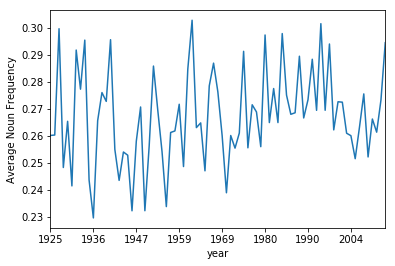

In [12]:
ax = df.groupby('year')['noun_freq'].mean().plot()
ax.set_ylabel('Average Noun Frequency')
plt.show()

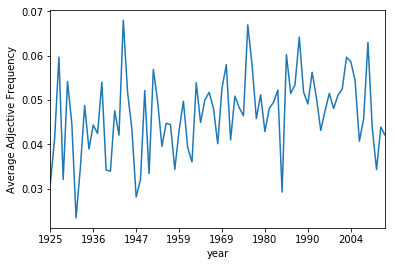

In [13]:
ax = df.groupby('year')['adjective_freq'].mean().plot()
ax.set_ylabel('Average Adjective Frequency')
plt.show()

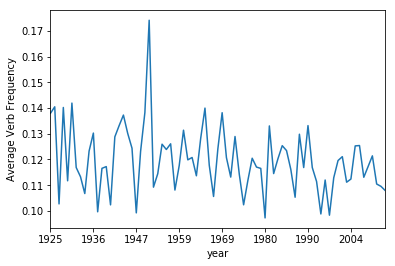

In [14]:
ax = df.groupby('year')['verb_freq'].mean().plot()
ax.set_ylabel('Average Verb Frequency')
plt.show()

### 3)Follow the steps in lecture to normalize your corpus (e.g., removing punctuation) and discuss your choices about what information to exclude. Using the normalized tokens, make a feature set of all trigrams that end in a noun. 

#### Normalize the corpus.

In [15]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input spacy doc and return clean list of tokens"
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower() # all lower case
        nopunc = lower.translate(translator) # remove punctuation
        words = nopunc.split() # split into tokens
        nostop = [w for w in words if w not in stoplist] # remove stopwords
        no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
        stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
        tokens += stemmed # add to list of tokens for this speech
    return tokens
        
df['tokens_cleaned'] = df['doc'].apply(normalize_text)
df['tokens_cleaned'].head()

4     [dawkin, district, judg, complain, brought, su...
17    [miller, district, judg, case, appeal, order, ...
32    [bryan, circuit, judg, writ, error, review, ju...
72    [parker, circuit, judg, appeal, decre, admiral...
78            [per, curiam, decre, affirm, open, court]
Name: tokens_cleaned, dtype: object

#### Produce term frequencies over words for each speech. Provide summary statistics on most-frequent and least-frequent words.

In [16]:
from collections import Counter
term_frequencies = Counter()

for tokens in df['tokens_cleaned']:
    term_frequencies.update(tokens)

term_frequencies.most_common()[:10]

[('#', 29652),
 ('court', 4573),
 ('v', 2993),
 ('state', 2950),
 ('us', 1971),
 ('sct', 1836),
 ('case', 1715),
 ('district', 1440),
 ('act', 1423),
 ('law', 1243)]

In [17]:
term_frequencies.most_common()[-10:]

[('wellaccept', 1),
 ('recidiv', 1),
 ('participatori', 1),
 ('lace', 1),
 ('inelig', 1),
 ('massag', 1),
 ('parlor', 1),
 ('ar', 1),
 ('13704b', 1),
 ('reissu', 1)]

### 4)Make a dataframe with at least 1000 features (frequencies over trigrams ending in a noun). Standardize the features to variance one while maintaining sparsity.

In [18]:
vocab = set(x[0] for x in term_frequencies.most_common()[:1000])

cleaned_freqs = []
for tokens in df['tokens_cleaned']:
    cleaned_freqs.append(Counter(tokens)) # make a counter for each row
    
features = pd.DataFrame(cleaned_freqs)

features.head()

,#,001¼,032703htm,06cr232,100221a,1006a,10138mm,101a,101b,1023e,...,—postal,—procedur,—provid,—there,•,•final,•the,•whether,⅜,□
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# fillna
features.fillna(0,inplace=True)
features.head()

,#,001¼,032703htm,06cr232,100221a,1006a,10138mm,101a,101b,1023e,...,—postal,—procedur,—provid,—there,•,•final,•the,•whether,⅜,□
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5)Link the dataframe to the outcome reverse. Create a training set and test set. Train a LogisticRegression model with default parameters to predict reversal. Compute accuracy and F1 for the prediction in the training set and in the test set.

#### Create a training set and test set.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['case_reversed'], test_size=0.2)

#### Train a logistic regression model

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Compute mean accuracy for the prediction in the training set and in the test set.

In [23]:
log_reg.score(X_test, y_test)

0.55

In [24]:
log_reg.score(X_train, y_train)

0.99375

#### Predictions for training and test set

In [25]:
y_pred_test=log_reg.predict(X_test)

In [26]:
y_pred_train=log_reg.predict(X_train)

#### Compute F1 score

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_test, average='macro')

0.4871794871794871

In [28]:
f1_score(y_train, y_pred_train, average='macro')

0.9935668047123155

### 6)Use GridSearchCV() to choose hyperparameters: L1 vs L2 penalty, and regularization parameter C. Report the best model parameters and score. Report the ROC Curve and AUC.

In [29]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_reg_cv=GridSearchCV(log_reg,grid,cv=2)
log_reg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

/home/imre/.conda/envs/BuildingRoboJudge/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Solver lbfgs supports only l2 penalties, got l1 penalty.